In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')




In [187]:
import plotly.express as px

In [188]:
df=pd.read_csv(r"C:\Users\war machine rocks\OneDrive\Desktop\E_Commerce.csv")

In [189]:

# Quick overview
df.head() 



,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [191]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [192]:
print("Missing values:\n", df.isnull().sum())


Missing values:
 ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64


In [193]:
# Group the data by 'Mode_of_Shipment' and calculate the mean of numerical columns
grouped_by_shipment = df.groupby('Mode_of_Shipment')['Customer_rating'].mean()

# Display the result
print(grouped_by_shipment)


Mode_of_Shipment
Flight    2.982555
Road      2.995455
Ship      2.991289
Name: Customer_rating, dtype: float64


The average customer ratings for the three shipment modes (Flight, Road, Ship) are very close to each other, all around 2.98 to 2.99. This suggests that the mode of shipment does not show significant variation in customer ratings based on this data

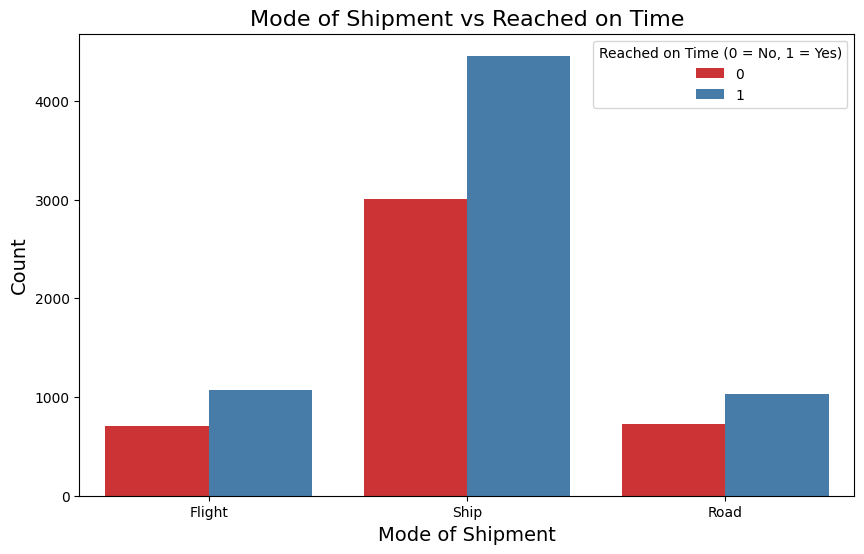

In [194]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Mode_of_Shipment', hue='Reached.on.Time_Y.N', 
              palette='Set1')

# Add labels and title
plt.title('Mode of Shipment vs Reached on Time', fontsize=16)
plt.xlabel('Mode of Shipment', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Reached on Time (0 = No, 1 = Yes)', loc='upper right')

# Show the plot
plt.show()


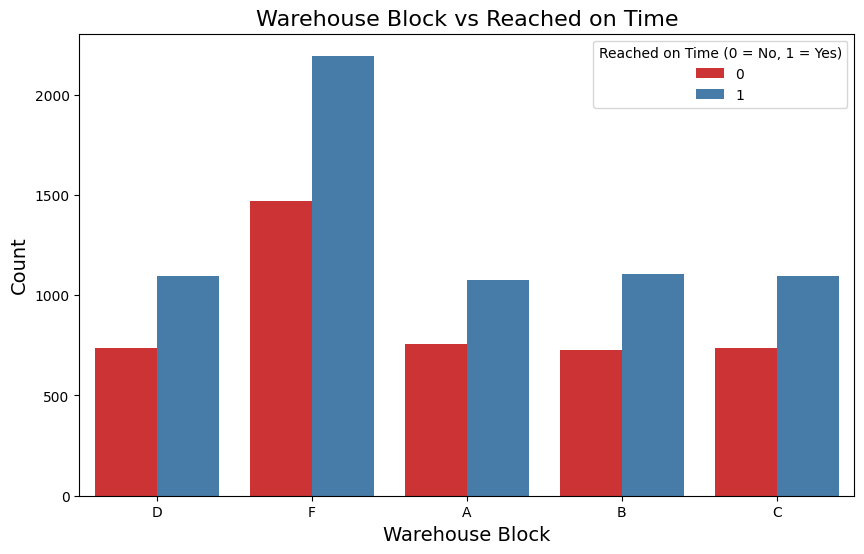

In [195]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Warehouse_block', hue='Reached.on.Time_Y.N', 
              palette='Set1')

# Add labels and title
plt.title('Warehouse Block vs Reached on Time', fontsize=16)
plt.xlabel('Warehouse Block', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Reached on Time (0 = No, 1 = Yes)', loc='upper right')

# Show the plot
plt.show()


In [196]:
median_cost = df['Cost_of_the_Product'].median()
df['Price_Category'] = df['Cost_of_the_Product'].apply(lambda x: 'Expensive' if x > median_cost else 'Cheap')


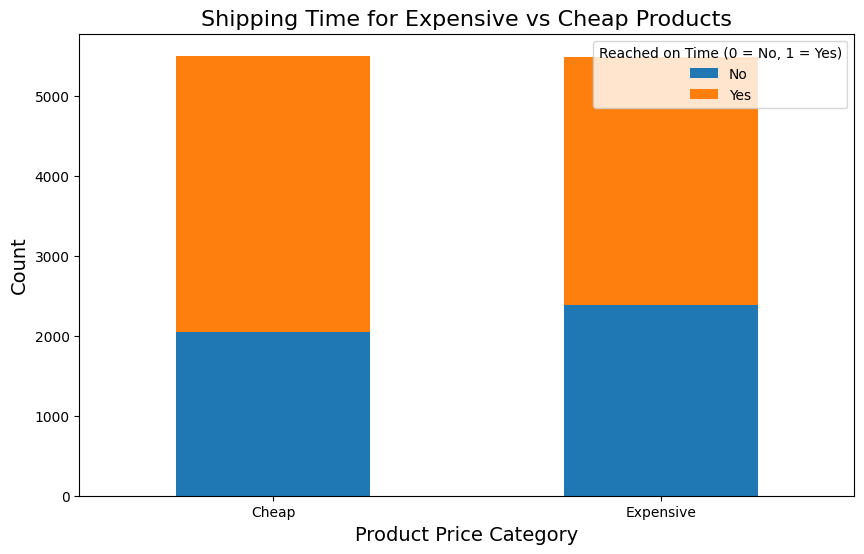

In [197]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the count of "Reached.on.Time_Y.N" for each "Price_Category"
df_counts = df.groupby(['Price_Category', 'Reached.on.Time_Y.N']).size().reset_index(name='Count')

# Create a pivot table to format the data for stacking
df_pivot = df_counts.pivot(index='Price_Category', columns='Reached.on.Time_Y.N', values='Count')
df_pivot = df_pivot.fillna(0)  # Fill any missing values with 0

# Plot the stacked bar chart
df_pivot.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], figsize=(10, 6))

# Add labels and title
plt.title('Shipping Time for Expensive vs Cheap Products', fontsize=16)
plt.xlabel('Product Price Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal
plt.legend(title='Reached on Time (0 = No, 1 = Yes)', labels=['No', 'Yes'])

# Show the plot
plt.show()


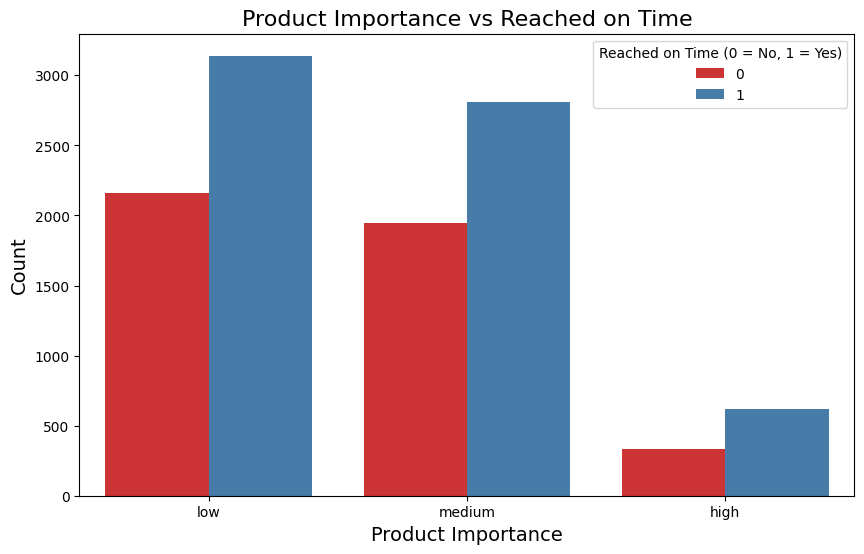

In [198]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Product_importance', hue='Reached.on.Time_Y.N', 
              palette='Set1')

# Add labels and title
plt.title('Product Importance vs Reached on Time', fontsize=16)
plt.xlabel('Product Importance', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Reached on Time (0 = No, 1 = Yes)', loc='upper right')

# Show the plot
plt.show()


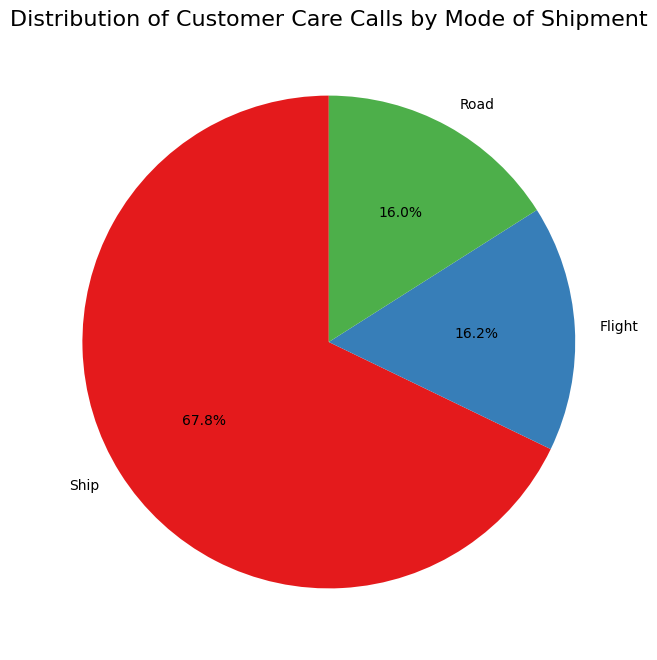

In [199]:
import matplotlib.pyplot as plt

# Count the number of occurrences of each Mode_of_Shipment
shipment_counts = df['Mode_of_Shipment'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(shipment_counts, labels=shipment_counts.index, autopct='%1.1f%%', 
        colors=plt.get_cmap('Set1').colors, startangle=90)

# Add title
plt.title('Distribution of Customer Care Calls by Mode of Shipment', fontsize=16)

# Show the plot
plt.show()


In [200]:
from scipy import stats

# Separate the data based on 'Reached.on.Time_Y.N'
on_time = df[df['Reached.on.Time_Y.N'] == 1]['Customer_care_calls']
not_on_time = df[df['Reached.on.Time_Y.N'] == 0]['Customer_care_calls']

# Perform a t-test
t_stat, p_value = stats.ttest_ind(on_time, not_on_time)

# Print the result
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")



T-statistic: -7.0551718720842365
P-value: 1.827535178623975e-12


The T-test is used here to compare the average number of Customer Care Calls between two groups of products: those that reached on time (1) and those that did not reach on time (0)


Goal: We want to know if the number of customer care calls is different between products that reached on time and those that didn't. In other words, does the number of customer care calls influence whether a product is delivered on time?

What does the T-test do?: The T-test compares the average (mean) number of customer care calls in each group:

Group 1: Products that reached on time.
Group 2: Products that did not reach on time.

T-statistic: -7.06: This number tells us that there is a large difference between the two groups (products that reached on time vs. those that didn’t) in terms of the number of customer care calls. The negative sign simply means that products that didn’t reach on time had more customer care calls on average.


Conclusion:

The number of customer care calls is significantly different between products that reached on time and those that didn’t.

Products that did not reach on time tend to have more customer care calls on average.

This suggests that customer care calls might be a sign of potential issues that could affect whether a product arrives on time.

In [201]:
# Calculate the correlation
correlation = df['Customer_care_calls'].corr(df['Reached.on.Time_Y.N'])

print(f"Correlation between Customer Care Calls and Reached on Time: {correlation}")


Correlation between Customer Care Calls and Reached on Time: -0.0671258557119832


Imagine you want to know if two things are related to each other. For example, if the number of customer care calls and whether a product reaches on time are connected. Correlation is a way to measure how strongly these two things are related.

Correlation helps us understand if increasing one thing (like customer care calls) is linked to increasing or decreasing another thing (like products reaching on time)

By calculating the correlation, we tried to understand if there's a predictable pattern between customer care calls and delivery times. But in this case, the result shows that there’s no strong connection between the two. So, customer care calls might not be a reliable indicator of whether products will be delivered on time.

In [202]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load your dataset (use the correct method to load your data)

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Encode categorical columns
df['Product_importance_encoded'] = label_encoder.fit_transform(df['Product_importance'])
df['Gender_encoded'] = label_encoder.fit_transform(df['Gender'])
df['Cost_of_the_Product_encoded'] = label_encoder.fit_transform(df['Cost_of_the_Product'])
df['Price_Category_encoded'] = label_encoder.fit_transform(df['Price_Category'])



In [203]:
# Drop the original categorical columns and any non-feature columns like ID
df_encoded = df.drop(columns=['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender', 'Cost_of_the_Product','Price_Category'])



In [204]:
df_encoded

,Customer_care_calls,Customer_rating,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Product_importance_encoded,Gender_encoded,Cost_of_the_Product_encoded,Price_Category_encoded
0,4,2,3,44,1233,1,1,0,81,0
1,4,5,2,59,3088,1,1,1,120,1
2,2,2,4,48,3374,1,1,1,87,0
3,3,3,4,10,1177,1,2,1,80,0
4,2,2,3,46,2484,1,2,0,88,0
...,...,...,...,...,...,...,...,...,...,...
10994,4,1,5,1,1538,1,2,0,156,1
10995,4,1,5,6,1247,0,2,0,136,1
10996,5,4,5,4,1155,0,1,0,146,1
10997,5,2,6,2,1210,0,2,1,127,1


In [205]:
# Split the data into features (X) and target (y)
X = df_encoded.drop(columns=['Reached.on.Time_Y.N'])  # Features
y = df_encoded['Reached.on.Time_Y.N']  # Target variable

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features for models that require it (e.g., Logistic Regression, SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [206]:

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(random_state=42, max_iter=1000)  # max_iter for convergence

# Train the model
logreg_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_logreg = logreg_model.predict(X_test_scaled)

# Evaluate the Logistic Regression model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
class_report_logreg = classification_report(y_test, y_pred_logreg)

# Print the evaluation results for Logistic Regression
print(f"Logistic Regression Accuracy: {accuracy_logreg:.4f}")
print("Logistic Regression Confusion Matrix:")
print(conf_matrix_logreg)
print("Logistic Regression Classification Report:")
print(class_report_logreg)

Logistic Regression Accuracy: 0.6318
Logistic Regression Confusion Matrix:
[[489 406]
 [404 901]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.55      0.55       895
           1       0.69      0.69      0.69      1305

    accuracy                           0.63      2200
   macro avg       0.62      0.62      0.62      2200
weighted avg       0.63      0.63      0.63      2200



1. Precision:
Focus: How many of the predicted positive instances are actually correct?

2. Recall:
Focus: How many actual positive instances did the model correctly identify?

Logistic Regression:
Accuracy: 63.18%

This means that the Logistic Regression model correctly predicted whether or not a product would arrive on time about 63% of the time.

Precision, Recall, and F1-Score:

Precision: Measures how many of the products predicted as "Yes" (on time) were actually on time.

For the "Yes" class (1), precision is 69%. This means 69% of the products predicted to be on time were actually on time.

Recall: Measures how many of the actual "Yes" products were correctly predicted.

For the "Yes" class (1), recall is 69%. This means the model correctly identified 69% of the products that were on time.

F1-Score: Combines precision and recall into a single score. For the "Yes" class (1), F1 is 69%.

For "No" (0), the scores are lower (around 55%), meaning the model is less accurate at predicting products that won't be on time.

In [207]:
# Train a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation results
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.6641
Confusion Matrix:
[[617 278]
 [461 844]]
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.69      0.63       895
           1       0.75      0.65      0.70      1305

    accuracy                           0.66      2200
   macro avg       0.66      0.67      0.66      2200
weighted avg       0.68      0.66      0.67      2200



 Random Forest
Accuracy: 66.41%

This machine learning model is slightly better than Logistic Regression, correctly predicting whether or not a product will arrive on time around 66% of the time.
Precision, Recall, and F1-Score:

Precision for "Yes" is 75%, meaning 75% of the products predicted to be on time actually were.

Recall for "Yes" is 65%, meaning the model correctly identified 65% of the products that were actually on time.

F1-Score for "Yes" is 70%, which is a good balance between precision and recall.

For "No" (0), precision is around 57%, and recall is 69%, meaning the model is somewhat better at detecting when a product will be late.